# Introduction to ARIMA Models

- ARIMA, short for __‘Auto Regressive Integrated Moving Average’__ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

- Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

- An ARIMA model is characterized by 3 terms: p, d, q where,

    - p is the order of the AR term
    - q is the order of the MA term
    - d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. 

#### d term

- The first step to build an ARIMA model is to make the time series stationary. Why?

- Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

- The most common approach is to __difference__ it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

- The value of __d__, therefore, is the minimum number of differencing needed to make the series stationary. 

- And if the time series is already stationary, then d = 0.

#### Next, what are the ‘p’ and ‘q’ terms?

- ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. 

- And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

** ARIMA model in words:**

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

# (1) How to find the order of differencing (d) in ARIMA model

- The purpose of differencing it to make the time series stationary.

- But you need to be careful to not over-difference the series. Because, an over differenced series may still be non-stationary, which in turn will affect the model parameters.

- ** So how to determine the right order of differencing? **

- The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. 

- On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

(1) First, check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

Why?

Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [114]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [115]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\wwwusage.csv"

In [116]:
df = pd.read_csv(location, names=['value'], header=0)

In [117]:
df.head()

,value
0,88
1,84
2,85
3,85
4,84


In [118]:
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


Since P-value is greater than the significance level, that means the TS is non stationary

let’s difference the series and see how the autocorrelation plot looks like.

#### Example - pandas - diff

- used for series differencing (making TS stationary)

- Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is the element in the same column of the previous row).

- why differencing? 
    - After you first-order difference, what do you have? 
    - Another time series which is, under the right conditions, closer to stationary. 
    - If it's not close enough, you now have a time series that's not stationary and you want to move it closer to stationary, so you take a first-order difference. (Which happens to be a second-order difference of the original time series.) 
    - If this differenced time series isn't close enough to stationary, we ... [recurse] ...

In [119]:
df1 = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                   'b': [1, 1, 2, 3, 5, 8],
                   'c': [1, 4, 9, 16, 25, 36]})
df1

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25
5,6,8,36


In [120]:
df1.diff()

,a,b,c
0,NaN,NaN,NaN
1,1.0,0.0,3.0
2,1.0,1.0,5.0
3,1.0,1.0,7.0
4,1.0,2.0,9.0
5,1.0,3.0,11.0


In [121]:
# same as previous one
df1.diff(axis = 0, periods = 1)

,a,b,c
0,NaN,NaN,NaN
1,1.0,0.0,3.0
2,1.0,1.0,5.0
3,1.0,1.0,7.0
4,1.0,2.0,9.0
5,1.0,3.0,11.0


In [122]:
# Difference with 3rd previous row
df1.diff(periods=3)

,a,b,c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,3.0,2.0,15.0
4,3.0,4.0,21.0
5,3.0,6.0,27.0


... back to the main code

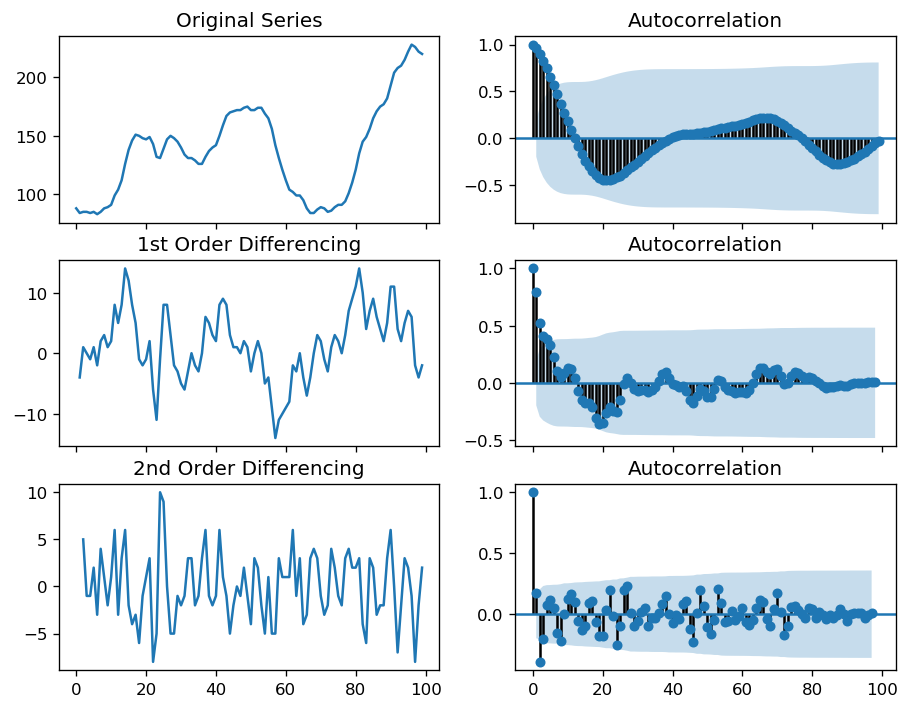

In [125]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value)
axes[0, 0].set_title('Original Series')

acf0 = plot_acf(df.value, ax=axes[0, 1])

# 1st order Differencing
axes[1, 0].plot(df.value.diff()); 
axes[1, 0].set_title('1st Order Differencing')

acf1 = plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd order Differencing
axes[2, 0].plot(df.value.diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')

acf2 = plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])


In [59]:
result = adfuller(df.value.diff().dropna())
print('1st order diff : ADF Statistic: %f' % result[0], end=',')
print('p-value: %f' % result[1])

result = adfuller(df.value.diff().diff().dropna())
print('2nd order diff : ADF Statistic: %f' % result[0], end=',')
print('p-value: %f' % result[1])

1st order diff : ADF Statistic: -2.722238,p-value: 0.070268
2nd order diff : ADF Statistic: -9.929762,p-value: 0.000000


#### Observation

- For the above series, the time series reaches stationarity with 2 orders of differencing. 

- But looking at the autocorrelation plot for the 2nd differencing, the lag goes into the far negative zone fairly quick, which indicates, the series might have been __over differenced.__

- we will consider d = 1

# (2) How to find the order of the AR term (p)

- After differencing the TS, we need to ensure there is no autocorrelation in the differenced time series 

- determine the AR and MA terms

- You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

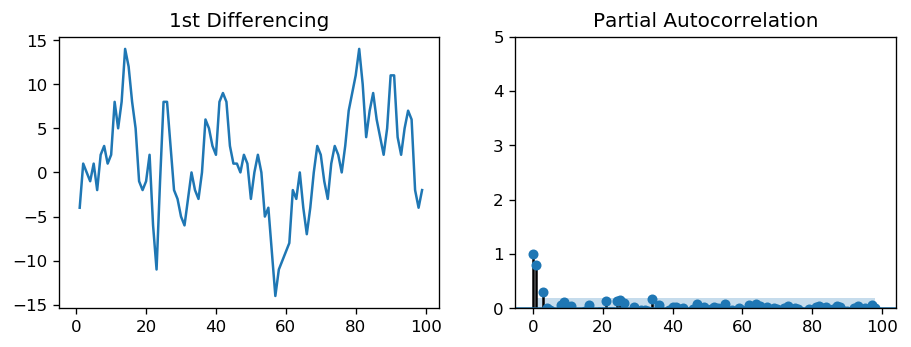

In [62]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

pacf = plot_pacf(df.value.diff().dropna(), ax=axes[1])

- You can observe that the PACF lag 1 is quite significant since is well above the significance line. 

- Lag 2 turns out to be significant as well, slightly managing to cross the significance limit (blue region). 

- we can be conservative and tentatively fix the p as 1.

# (3) How to find the order of the MA term (q)

look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

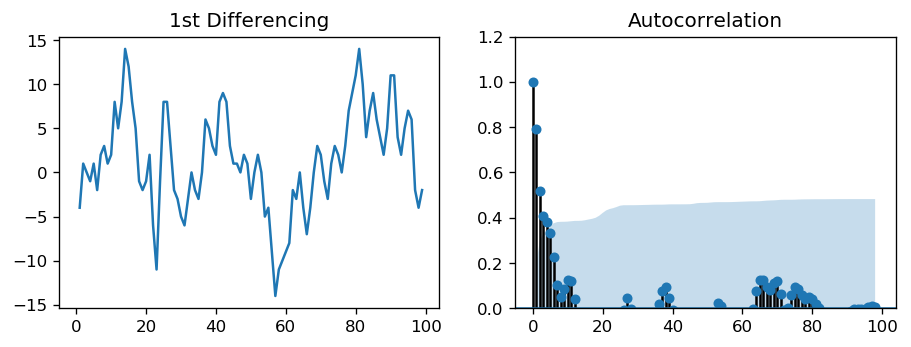

In [64]:
fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')

axes[1].set(ylim=(0,1.2))

acf = plot_acf(df.value.diff().dropna(), ax=axes[1])

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y.

# build the ARIMA Model

Now that you’ve determined the values of p, d and q, you have everything needed to fit the ARIMA model. Let’s use the ARIMA() implementation in statsmodels package.

In [73]:
# load the dataset
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\austa.csv"

In [74]:
df_austa = pd.read_csv(location)
df_austa.head()

,date,value
0,1980-01-01,0.829894
1,1981-01-01,0.859511
2,1982-01-01,0.876689
3,1983-01-01,0.866707
4,1984-01-01,0.932052


In [75]:
# set_index to date
df_austa.set_index('date', inplace=True)
df_austa.head()

,value
date,
1980-01-01,0.829894
1981-01-01,0.859511
1982-01-01,0.876689
1983-01-01,0.866707
1984-01-01,0.932052


In [76]:
# check stationarity
result = adfuller(df_austa.value.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.358294
p-value: 0.916833


p-value is NOT less than 0.05. hence we cannot reject the null hypothesis. the H0 : the TS is non stationary. 

Hence the TS is non-stationary

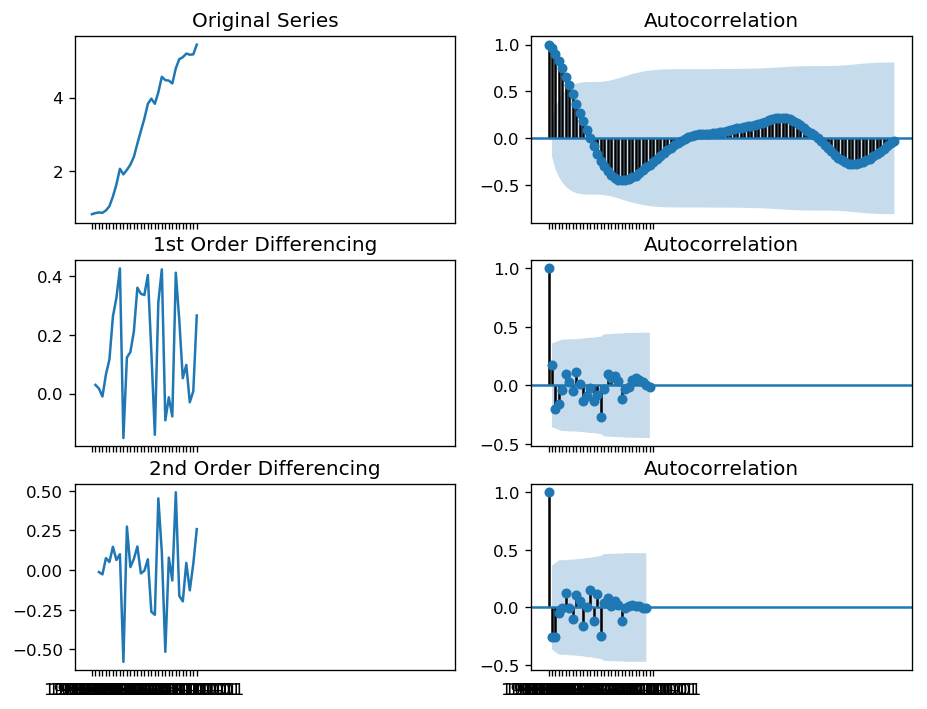

In [81]:
# determine d

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_austa.value)
axes[0, 0].set_title('Original Series')

acf0 = plot_acf(df.value, ax=axes[0, 1])

# 1st order Differencing
axes[1, 0].plot(df_austa.value.diff()); 
axes[1, 0].set_title('1st Order Differencing')

acf1 = plot_acf(df_austa.value.diff().dropna(), ax=axes[1, 1])

# 2nd order Differencing
axes[2, 0].plot(df_austa.value.diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')

acf2 = plot_acf(df_austa.value.diff().diff().dropna(), ax=axes[2, 1])


In [82]:
result = adfuller(df_austa.value.diff().dropna())
print('1st order diff : ADF Statistic: %f' % result[0], end=',')
print('p-value: %f' % result[1])

result = adfuller(df_austa.value.diff().diff().dropna())
print('2nd order diff : ADF Statistic: %f' % result[0], end=',')
print('p-value: %f' % result[1])

1st order diff : ADF Statistic: -4.222667,p-value: 0.000603
2nd order diff : ADF Statistic: -4.446179,p-value: 0.000246


#### Observation

- For the above series, the time series reaches stationarity with 1 orders of differencing. 

- with lag = 2, the lag goes into the far negative zone fairly quick, which indicates, the series might have been __over differenced.__

- we will consider __d = 1__

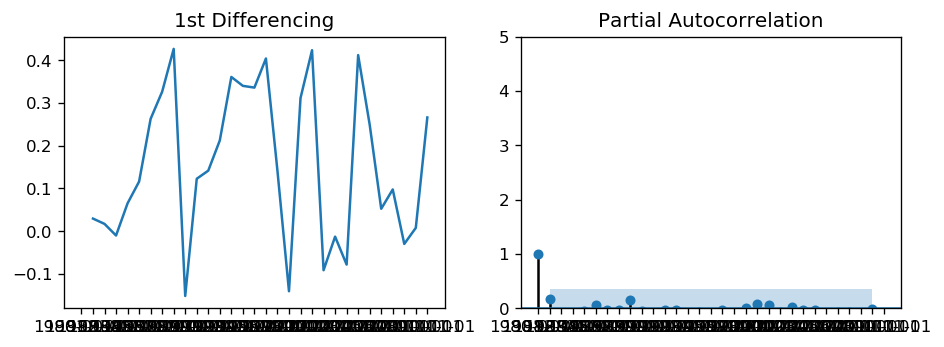

In [83]:
# determin p (AR term)

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].plot(df_austa.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

pacf = plot_pacf(df_austa.value.diff().dropna(), ax=axes[1])

- You can observe that the PACF lag 1 is quite significant since is well above the significance line. 

- Lag 2 turns out to be within the significance limit (blue region). 

- we can be conservative and tentatively fix the p as 1.

In [84]:
# determin q (MA term)

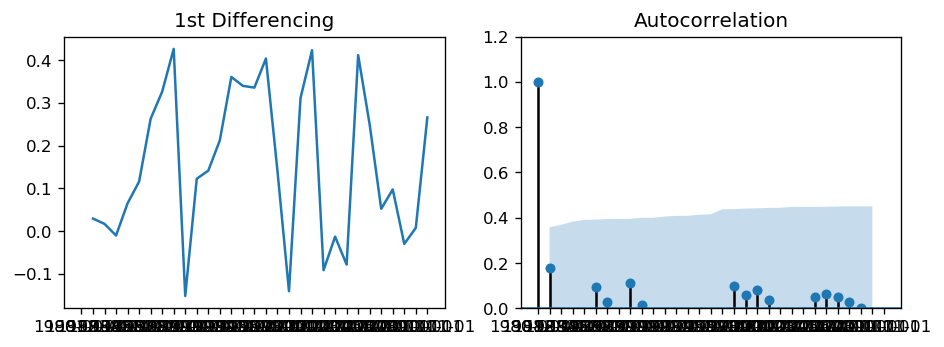

In [85]:
fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].plot(df_austa.value.diff()); axes[0].set_title('1st Differencing')

axes[1].set(ylim=(0,1.2))

acf = plot_acf(df_austa.value.diff().dropna(), ax=axes[1])

1st lag is outside of the blue region, the 2nd lag lag is within blue region

so we can take q = 1

In [89]:
# 1,1,1 ARIMA Model
model     = ARIMA(df_austa.value, order=(2, 1, 1))
model_fit = model.fit(disp=0)

print(model_fit.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   30
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  10.924
Method:                       css-mle   S.D. of innovations              0.168
Date:                Fri, 12 Apr 2019   AIC                            -11.848
Time:                        13:12:58   BIC                             -4.842
Sample:                    01-01-1981   HQIC                            -9.607
                         - 01-01-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1588      0.027      5.907      0.000       0.106       0.212
ar.L1.D.value     0.5871      0.560      1.049      0.304      -0.510       1.684
ar.L2.D.value    -0.3156      0.185     

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


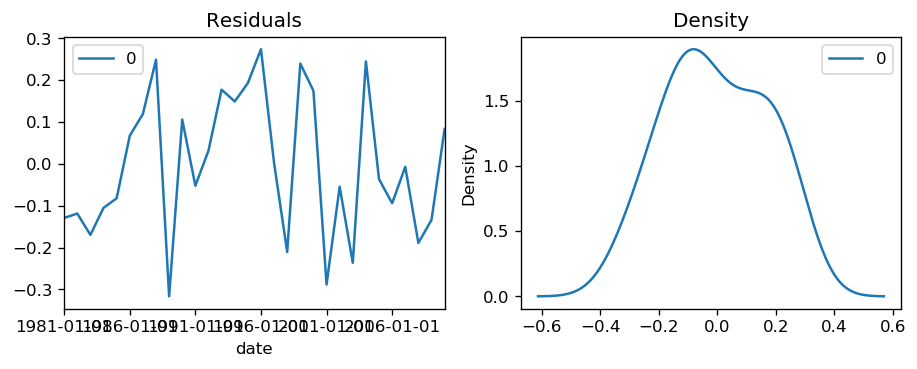

In [90]:
# plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax   = plt.subplots(1,2)

residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind ='kde', title='Density', ax=ax[1])

The residual errors seem fine with near zero mean and uniform variance. 

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


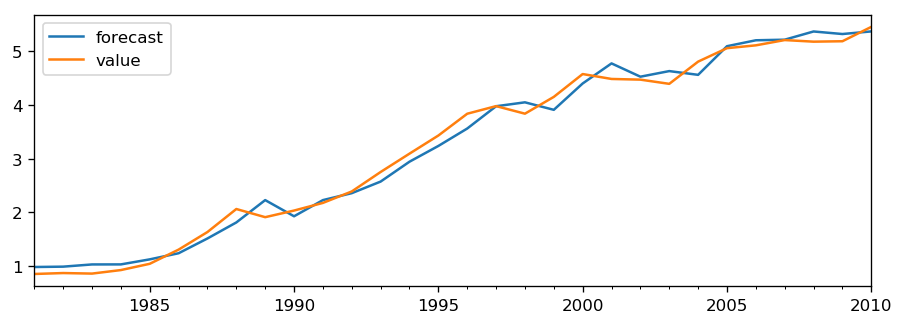

In [92]:
# Let’s plot the actuals against the fitted values using plot_predict().
 
# Actual vs Fitted
act_pred = model_fit.plot_predict(dynamic=False)

## Out-of-Time cross-validation.

- In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

- To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

In [97]:
df_austa.shape

(31, 1)

In [99]:
# Create Training and Test
train = df_austa.value[:22]
test  = df_austa.value[22:]

In [101]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model  = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [104]:
# Forecast
fc, se, conf = fitted.forecast(9, alpha=0.05)  # 95% conf

In [105]:
# Make as pandas series
fc_series    = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

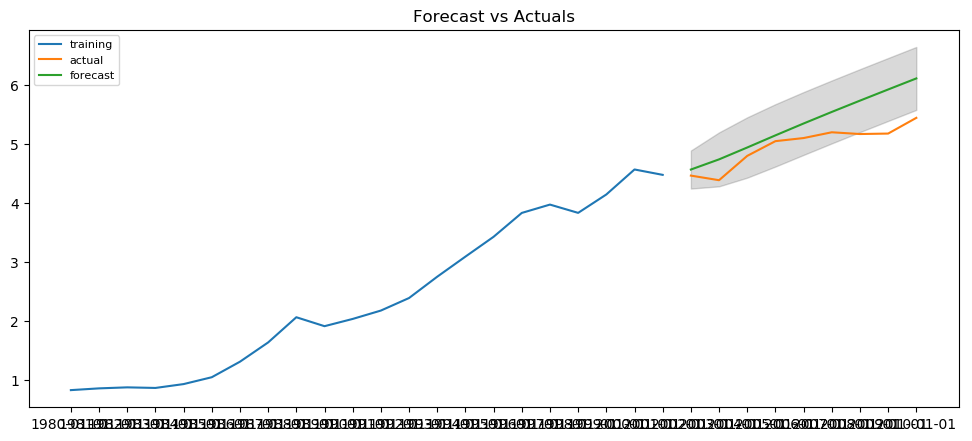

In [106]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

# Accuracy Metrics for Time Series Forecast

    Mean Absolute Percentage Error (MAPE)
    Mean Error (ME)
    Mean Absolute Error (MAE)
    Mean Percentage Error (MPE)
    Root Mean Squared Error (RMSE)
    Lag 1 Autocorrelation of Error (ACF1)
    Correlation between the Actual and the Forecast (corr)
    Min-Max Error (minmax)
    
Typically, if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.

Why not use the other metrics?

Because only the above three are percentage errors that vary between 0 and 1. That way, you can judge how good is the forecast irrespective of the scale of the series.

The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.

In [110]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

In [113]:
forecast_accuracy(fc, test.values)

{'corr': 0.9264585770863843,
 'mae': 0.36291021345517943,
 'mape': 0.07150618046607253,
 'me': 0.36291021345517943,
 'minmax': 0.0652302554473424,
 'mpe': 0.07150618046607253,
 'rmse': 0.43040231148641617}

Around 7.1% MAPE implies the model is about 92.9% accurate in predicting the next 15 observations.

# Auto Arima Forecast in Python

# How to automatically build SARIMA model in python